In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df2 = pd.read_csv('tgfbeta_paper_hth_sb_organoid_data.csv', index_col = 0)

In [4]:
df2['conc'] = df2.Trtmnt.str.extract(r"([-+]?\d*\.\d+|[-+]?\d+)", expand = True)[0]

In [5]:
df2['group2'] = 'hello'

In [6]:
df2.loc[df2['Trtmnt'].str.contains('SB'), 'group2'] = 'SB+HTH'

In [7]:
df2.loc[df2['group2'] != 'SB+HTH', 'group2'] = 'HTH Only'

In [8]:
#Trtmnt = pd.api.types.CategoricalDtype([ 'HTH', 'SB + 0nm HTH', '1nm HTH', 'SB + 1nm HTH', '10nm HTH', 'SB + 10nm HTH', '50nm HTH', 'SB + 50nm HTH', '100nm HTH', 'SB + 100nm HTH', '175nm HTH', 'SB + 175nm HTH',
 #'250nm HTH', 'SB + 250nm HTH'], ordered = True)

In [9]:
#df2[''] = df2['Trtmnt'].astype(Trtmnt)

In [10]:
#df2.sort_values(by = 'Trtmnt')

In [11]:
ix = [ '0nm HTH', 'SB + 0nm HTH', '1nm HTH', 'SB + 1nm HTH', '10nm HTH', 'SB + 10nm HTH', '50nm HTH', 'SB + 50nm HTH', '100nm HTH', 'SB + 100nm HTH', '175nm HTH', 'SB + 175nm HTH',
 '250nm HTH', 'SB + 250nm HTH']

In [12]:
df2['% Traced crypts'].astype('float')

Numerator
0.0    0.0
0.0    0.0
1.0    0.0
0.0    0.0
1.0    0.0
      ... 
1.0    0.0
1.0    0.0
1.0    0.0
1.0    0.0
1.0    0.0
Name: % Traced crypts, Length: 2035, dtype: float64

In [13]:
df2 

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2
Numerator,,,,,
0.0,0,0.0,0nm HTH,0,HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only
...,...,...,...,...,...
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH


In [14]:
df2['group'] = 'hello'

In [15]:
df2.loc[(df2['Crypts/organoid (Denominator)'] == '0') | (df2['Crypts/organoid (Denominator)'] == '1') | (df2['Crypts/organoid (Denominator)'] == '1 S'),'group'] = 'Spheroid'
#df2.loc[(df2['Crypts/organoid (Denominator)'] == '1 S'),'group'] = 'Spheroid'

In [16]:
df2.loc[df2['group'] != 'Spheroid','group'] = 'Crypt'

In [17]:
import matplotlib.pyplot as plt

In [18]:
df2 = df2.loc[df2['conc'] != '1',]

In [19]:
ix = [x for x in ix if x in df2.Trtmnt.unique()]

In [20]:
df2.Trtmnt.unique()

array(['0nm HTH', '10nm HTH', '50nm HTH', '100nm HTH', '175nm HTH',
       '250nm HTH', 'SB + 0nm HTH', 'SB + 10nm HTH', 'SB + 50nm HTH',
       'SB + 100nm HTH', 'SB + 175nm HTH', 'SB + 250nm HTH'], dtype=object)

In [21]:
ix

['0nm HTH',
 'SB + 0nm HTH',
 '10nm HTH',
 'SB + 10nm HTH',
 '50nm HTH',
 'SB + 50nm HTH',
 '100nm HTH',
 'SB + 100nm HTH',
 '175nm HTH',
 'SB + 175nm HTH',
 '250nm HTH',
 'SB + 250nm HTH']

In [22]:
df2['conc'] =df2['conc'].astype('str')

/tmp/ipykernel_1274163/571500423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['conc'] =df2['conc'].astype('str')


<Axes: xlabel='conc', ylabel='% Traced crypts'>

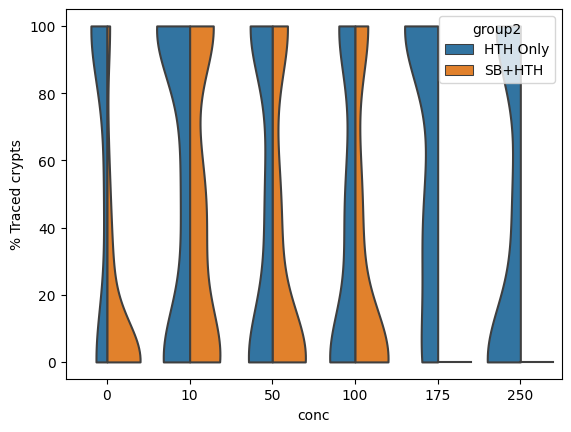

In [23]:
sns.violinplot(data = df2, x = 'conc', y = '% Traced crypts', alpha = 0.5,hue = 'group2', inner = None, split = True, cut = 0, scale = 'area', scale_hue=True)


In [24]:
#uniques = df2['group'].unique()

In [25]:
#palette = dict(zip(uniques, sns.color_palette(n_colors=len(uniques))))


In [26]:
palette ={"Crypt": "#2166AC", "Spheroid": "#B2182B"}


In [27]:
import seaborn.categorical
seaborn.categorical._Old_Violin = seaborn.categorical._ViolinPlotter

class _My_ViolinPlotter(seaborn.categorical._Old_Violin):

    def __init__(self, *args, **kwargs):
        super(_My_ViolinPlotter, self).__init__(*args, **kwargs)
        self.gray='black'

seaborn.categorical._ViolinPlotter = _My_ViolinPlotter

In [28]:
df3 = df2.loc[df2['group'] == 'Spheroid',]
df4 = df2.loc[df2['group'] == 'Crypt']

In [29]:
df3.loc[(df3['% Traced crypts'] > 0) & (df3['% Traced crypts'] < 100),'% Traced crypts'] 

Numerator
1.0    10.0
1.0     1.0
1.0    10.0
1.0    10.0
1.0    10.0
Name: % Traced crypts, dtype: float64

In [30]:
df3.loc[(df3['% Traced crypts'] > 0) & (df3['% Traced crypts'] < 100),'% Traced crypts'] = 100

In [31]:
palette ={"HTH Only": "#2166AC", "SB+HTH": "#B2182B"}

[None, None, None, None, None, None, None, None]

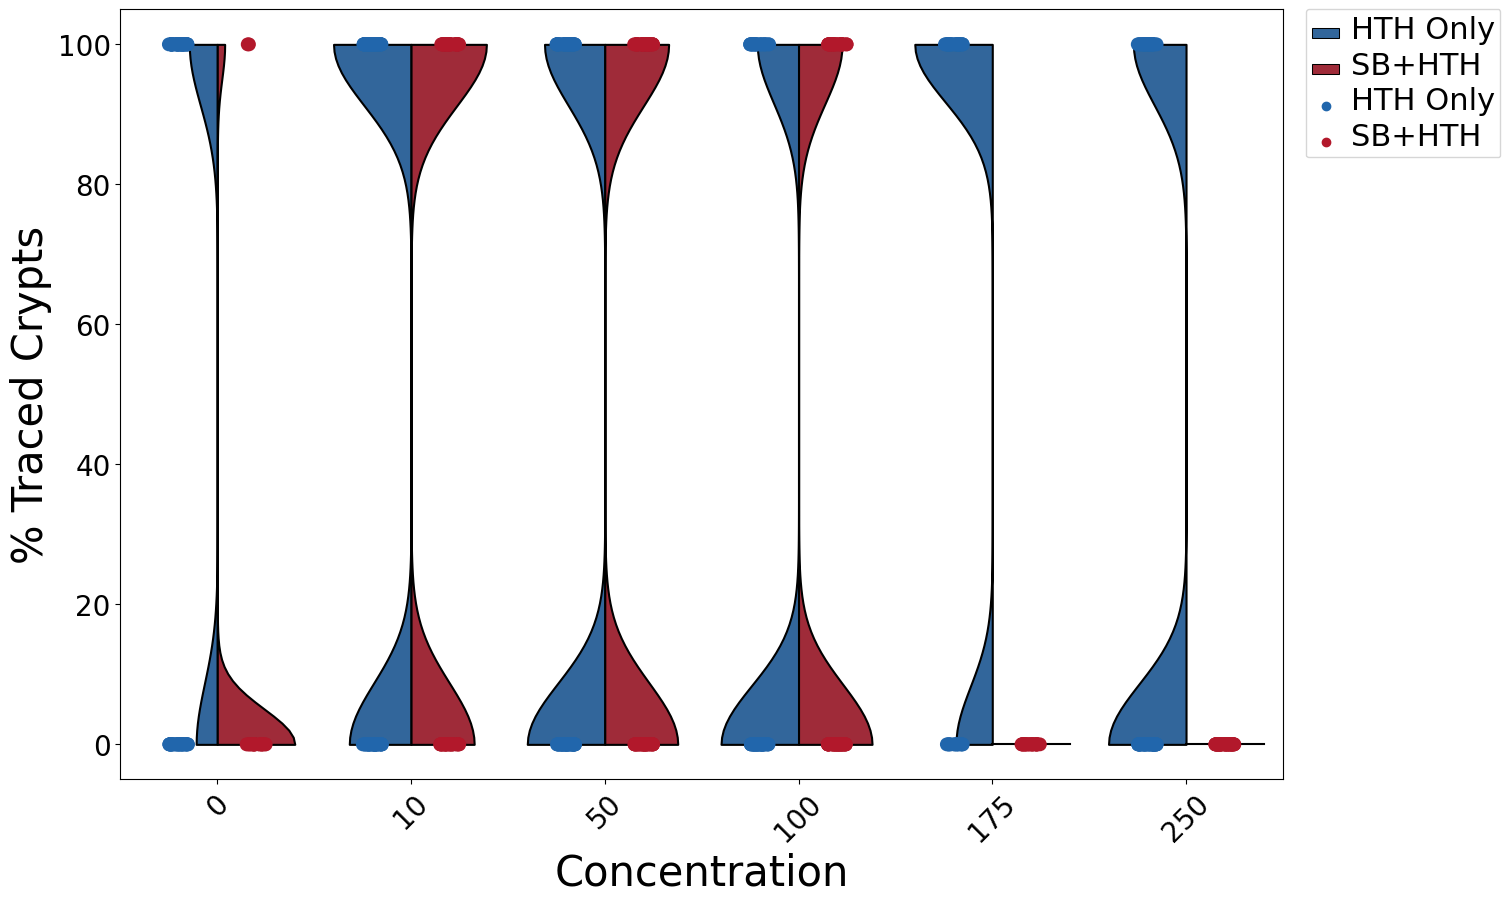

In [32]:
sns.violinplot(data = df3, palette = palette, x = 'conc', y = '% Traced crypts', linecolor = 'black',alpha = 0.5,hue = 'group2', bw = 0.175, inner = None, split = True, cut = 0, scale = 'area', scale_hue=True)
sns.stripplot(data=df3,palette = palette, x= 'conc', y='% Traced crypts', size = 10, dodge = True, hue = 'group2')
g1 = plt.gca()
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.figure.set_size_inches(15, 10)
g1.tick_params(axis='both', which='major', labelsize=20)
g1.set_xlabel("Concentration",fontsize=30)
g1.set_ylabel("% Traced Crypts",fontsize=30)
g1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.setp(g1.get_legend().get_texts(), fontsize='22') 

In [33]:
df3.to_csv('fig7G_spheroids_only_sb_hth_lgr5_percent_tracing_redo.csv')

In [34]:
sns.despine(g1.figure, top = True, right = True)

In [35]:
g1.figure.savefig('tgfb_spheroid_violinPlot_pct_traced_crypts_redo2.pdf')

In [36]:
from scipy.stats import ttest_ind

In [37]:
df3_ttest = pd.DataFrame(df3['conc'].unique())
df3_ttest['ttest'] = 0
df3_ttest['pval'] = 0

In [38]:
for conc in df3['conc'].unique():
    ttest_val, pval = ttest_ind( a= np.array(df3.loc[(df3['conc'] == conc) & (df3['group2'] == 'HTH Only'),'% Traced crypts']), 
         b = np.array(df3.loc[(df3['conc'] == conc) & (df3['group2'] == 'SB+HTH'),'% Traced crypts']),axis  = None, equal_var = True, alternative = 'two-sided')
    df3_ttest.loc[df3_ttest[0] == conc, 'ttest'] = ttest_val
    df3_ttest.loc[df3_ttest[0] == conc, 'pval'] = pval

In [39]:
df3_ttest

,0,ttest,pval
0,0,4.445086,2.153388e-05
1,10,0.160675,8.725377e-01
2,50,-0.378330,7.056602e-01
3,100,-0.311248,7.560504e-01
4,175,7.486204,1.390166e-10
5,250,6.179532,6.246576e-09


In [40]:
df3_ttest.to_csv('fig7F_spheroids_sb_hth_ttests.csv')

[None, None, None, None, None, None, None, None]

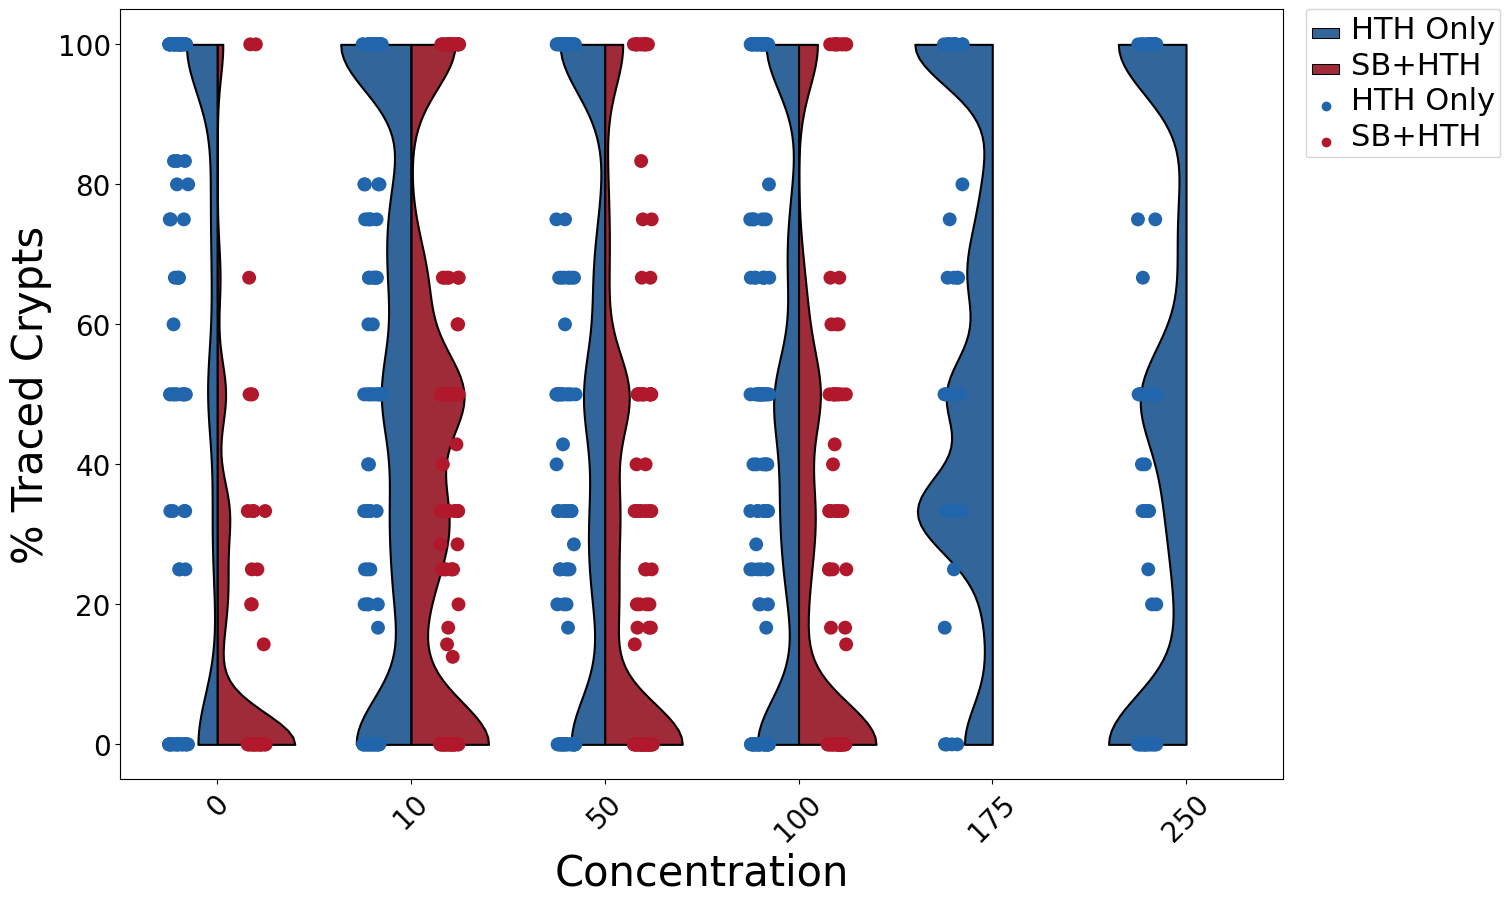

In [41]:
sns.violinplot(data = df4, x = 'conc', palette = palette, y = '% Traced crypts', bw = 0.175 ,alpha = 0.5,hue = 'group2', inner = None, split = True, cut = 0, scale = 'area', scale_hue=True)
sns.stripplot(data=df4, x= 'conc', palette = palette, size = 10, y='% Traced crypts', dodge = True, hue = 'group2')
g2 = plt.gca()
g2.set_xticklabels(g2.get_xticklabels(),rotation = 45)
g2.figure.set_size_inches(15, 10)
g2.tick_params(axis='both', which='major', labelsize=20)
g2.set_xlabel("Concentration",fontsize=30)
g2.set_ylabel("% Traced Crypts",fontsize=30)
g2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.setp(g2.get_legend().get_texts(), fontsize='22') 

In [42]:
sns.despine(g2.figure, top = True, right = True)

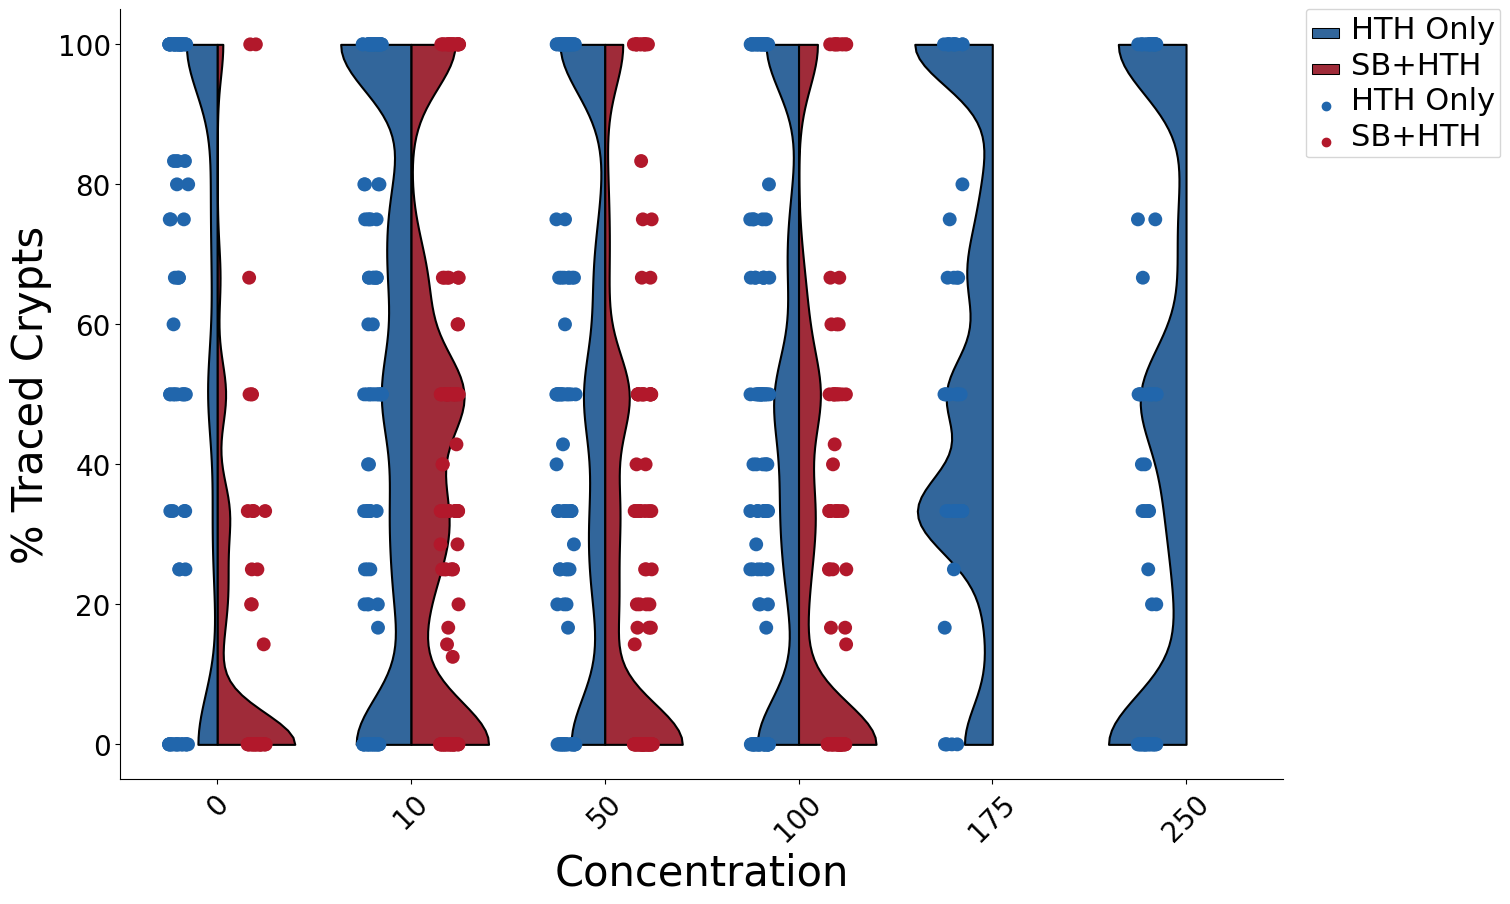

In [43]:
g2.figure

In [44]:
df4.to_csv('fig7F_classical_crypts_sb_hth_lgr5_percent_tracing_redo.csv')

In [45]:
g2.figure.savefig('tgfb_classical_crypts_violinPlot_pct_traced_crypts_redo2.pdf')

In [46]:
df4.loc[df4['conc'] == '0',:]

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group
Numerator,,,,,,
0.0,2,0.000000,0nm HTH,0,HTH Only,Crypt
0.0,2,0.000000,0nm HTH,0,HTH Only,Crypt
2.0,3,66.666667,0nm HTH,0,HTH Only,Crypt
1.0,2,50.000000,0nm HTH,0,HTH Only,Crypt
1.0,2,50.000000,0nm HTH,0,HTH Only,Crypt
...,...,...,...,...,...,...
0.0,3,0.000000,SB + 0nm HTH,0,SB+HTH,Crypt
0.0,3,0.000000,SB + 0nm HTH,0,SB+HTH,Crypt
0.0,2,0.000000,SB + 0nm HTH,0,SB+HTH,Crypt


In [47]:
np.array(df4.loc[(df4['conc'] == '0') & (df4['group2'] == 'HTH Only'),'% Traced crypts'])

array([  0.        ,   0.        ,  66.66666667,  50.        ,
        50.        , 100.        ,  50.        ,   0.        ,
        66.66666667, 100.        , 100.        ,   0.        ,
         0.        ,  50.        , 100.        , 100.        ,
       100.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  75.        ,   0.        ,   0.        ,
        50.        , 100.        ,  50.        ,   0.        ,
        75.        ,  50.        , 100.        , 100.        ,
       100.        , 100.        ,  33.33333333, 100.        ,
       100.        , 100.        ,  50.        ,  75.        ,
         0.        ,  83.33333333,  66.66666667,   0.        ,
       100.        , 100.        ,  50.        , 100.        ,
         0.        , 100.        ,  83.33333333, 100.        ,
        25.        ,  33.33333333,  80.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ,  80.        ,   0.        , 100.  

In [48]:
from scipy.stats import ttest_ind

In [49]:
df4_ttest = pd.DataFrame(df4['conc'].unique())
df4_ttest['ttest'] = 0
df4_ttest['pval'] = 0

In [50]:
for conc in df4['conc'].unique():
    ttest_val, pval = ttest_ind( a= np.array(df4.loc[(df4['conc'] == conc) & (df4['group2'] == 'HTH Only'),'% Traced crypts']), 
         b = np.array(df4.loc[(df4['conc'] == conc) & (df4['group2'] == 'SB+HTH'),'% Traced crypts']), axis  = None, equal_var = True, alternative = 'two-sided')
    df4_ttest.loc[df4_ttest[0] == conc, 'ttest'] = ttest_val
    df4_ttest.loc[df4_ttest[0] == conc, 'pval'] = pval

In [51]:
df4_ttest

,0,ttest,pval
0,0,6.411281,2.277826e-09
1,10,2.816761,5.290163e-03
2,50,4.877156,2.080188e-06
3,100,3.414430,7.651295e-04
4,175,NaN,NaN
5,250,NaN,NaN


In [52]:
df4_ttest.to_csv('fig7F_classical_crypts_sb_hth_ttests.csv')

In [53]:
ttest_val

nan

In [33]:
df5 = df2

In [34]:
df5['conc2'] = df5['conc'] + '_' + df5['group']

/tmp/ipykernel_619652/3697456878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['conc2'] = df5['conc'] + '_' + df5['group']


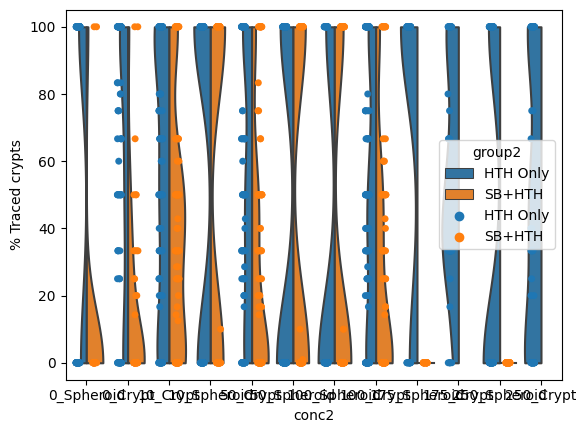

In [35]:
sns.violinplot(data = df5, x = 'conc2', y = '% Traced crypts', alpha = 0.5,hue = 'group2', inner = None, split = True, cut = 0, scale = 'area', scale_hue=True)
sns.stripplot(data=df5, x= 'conc2', y='% Traced crypts', dodge = True, hue = 'group2')
g2 = plt.gca()

In [36]:
g2.figure.set_size_inches(15, 10)
g2.set_xticklabels(g2.get_xticklabels(),rotation = 45)
g2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

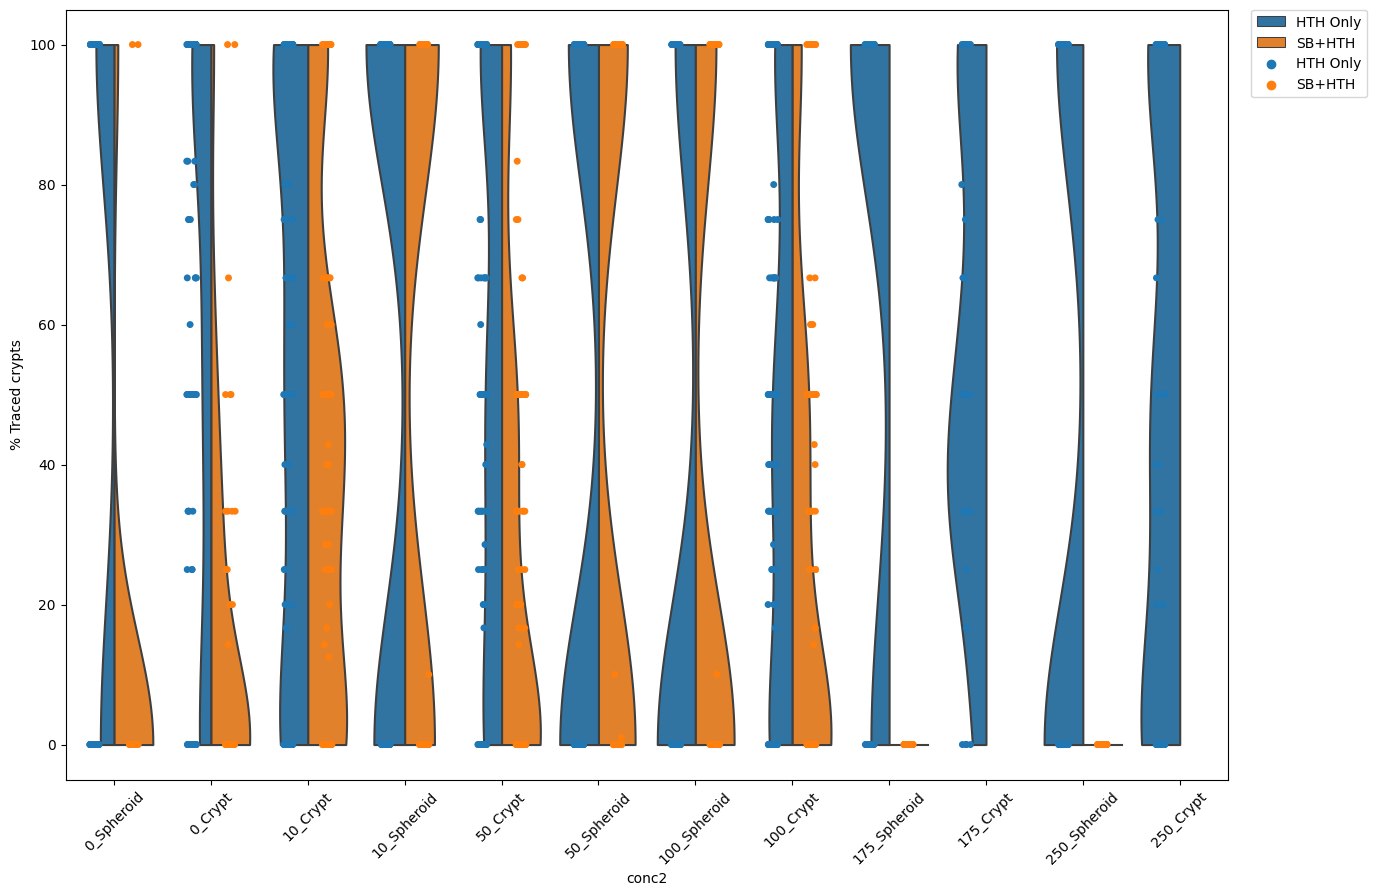

In [37]:
g2.figure

In [38]:
df5.loc[(df5['conc2'] == '0_Crypt') & (df5['group2'] == 'HTH Only'),]

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group,conc2
Numerator,,,,,,,
0.0,2,0.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt
0.0,2,0.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt
2.0,3,66.666667,0nm HTH,0,HTH Only,Crypt,0_Crypt
1.0,2,50.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt
1.0,2,50.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt
...,...,...,...,...,...,...,...
3.0,5,60.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt
5.0,5,100.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt
3.0,3,100.000000,0nm HTH,0,HTH Only,Crypt,0_Crypt


In [39]:
df5.groupby(['conc']).count()

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,group2,group,conc2
conc,,,,,,
0,244,245,245,245,245,245
10,397,397,397,397,397,397
100,365,365,365,365,365,365
175,122,122,122,122,122,122
250,216,216,216,216,216,216
50,390,390,390,390,390,390


In [40]:
df5.groupby(['conc2']).count()

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group
conc2,,,,,,
0_Crypt,135,136,136,136,136,136
0_Spheroid,109,109,109,109,109,109
100_Crypt,215,215,215,215,215,215
100_Spheroid,150,150,150,150,150,150
10_Crypt,223,223,223,223,223,223
10_Spheroid,174,174,174,174,174,174
175_Crypt,48,48,48,48,48,48
175_Spheroid,74,74,74,74,74,74
250_Crypt,70,70,70,70,70,70


In [41]:
df5['conc3'] = df5['conc'] + '_' + df5['group2'] + '_' + df5['group']

/tmp/ipykernel_619652/2914153433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['conc3'] = df5['conc'] + '_' + df5['group2'] + '_' + df5['group']


In [42]:
df5['conc4'] = df5['conc'] + '_' + df5['group2']

/tmp/ipykernel_619652/1394678602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['conc4'] = df5['conc'] + '_' + df5['group2']


In [43]:
df5

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group,conc2,conc3,conc4
Numerator,,,,,,,,,
0.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
...,...,...,...,...,...,...,...,...,...
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH


In [44]:
df_spheroid = pd.DataFrame(df5['conc4'].unique())

In [45]:
df_spheroid['counts'] = 0
df_spheroid['totals'] = 0

In [46]:
df_spheroid['og'] = df_spheroid[0].str.split('_', expand = True)[0]

In [47]:
df_spheroid

,0,counts,totals,og
0,0_HTH Only,0,0,0
1,10_HTH Only,0,0,10
2,50_HTH Only,0,0,50
3,100_HTH Only,0,0,100
4,175_HTH Only,0,0,175
5,250_HTH Only,0,0,250
6,0_SB+HTH,0,0,0
7,10_SB+HTH,0,0,10
8,50_SB+HTH,0,0,50
9,100_SB+HTH,0,0,100


In [48]:
df5

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group,conc2,conc3,conc4
Numerator,,,,,,,,,
0.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
...,...,...,...,...,...,...,...,...,...
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH


In [49]:
df5

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group,conc2,conc3,conc4
Numerator,,,,,,,,,
0.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
...,...,...,...,...,...,...,...,...,...
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH


In [50]:
for i in df_spheroid[0]:
    df_spheroid.loc[df_spheroid[0] == i, 'counts'] = len(df5.loc[(df5['conc4'] == i) &( df5['group'] == 'Spheroid') ,])
    df_spheroid.loc[df_spheroid[0] == i, 'totals'] = len(df5.loc[(df5['conc4'] == i) ,])

In [51]:
df_spheroid

,0,counts,totals,og
0,0_HTH Only,86,179,0
1,10_HTH Only,106,218,10
2,50_HTH Only,96,203,50
3,100_HTH Only,72,199,100
4,175_HTH Only,47,95,175
5,250_HTH Only,89,159,250
6,0_SB+HTH,23,66,0
7,10_SB+HTH,68,179,10
8,50_SB+HTH,75,187,50
9,100_SB+HTH,78,166,100


In [52]:
df_spheroid['percent'] = df_spheroid['counts'] / df_spheroid['totals']

In [53]:
df_spheroid['trtmnt'] = df_spheroid[0].str.split('_', expand = True)[1]

<Axes: xlabel='og', ylabel='percent'>

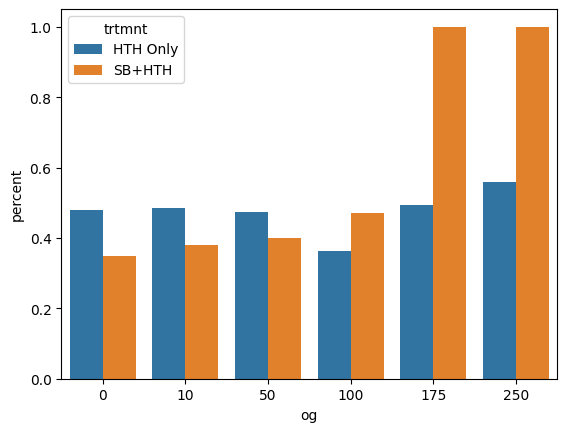

In [54]:
sns.barplot(data = df_spheroid, x = 'og', y = 'percent', hue = 'trtmnt')

In [55]:
df_organoids = df_spheroid.copy()

In [56]:
df_organoids['percent'] = 1 - df_organoids['percent']

<Axes: xlabel='og', ylabel='percent'>

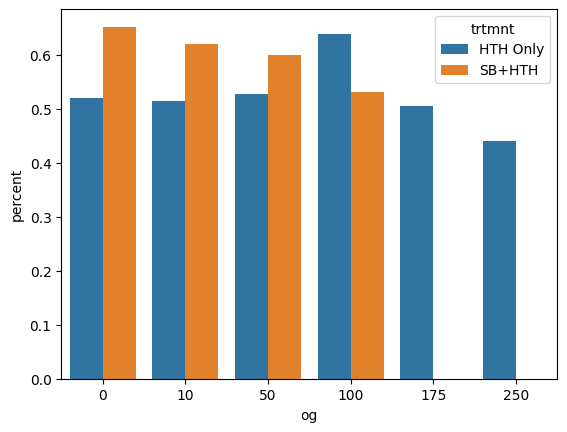

In [57]:
sns.barplot(data = df_organoids, x = 'og', y = 'percent', hue = 'trtmnt')

In [58]:
df5.loc[df5['Crypts/organoid (Denominator)'] == '1 S', 'Crypts/organoid (Denominator)'] = 1

In [59]:
df5.loc[df5['Crypts/organoid (Denominator)'] == '0 S', 'Crypts/organoid (Denominator)'] = 0

In [60]:
df5['Crypts/organoid (Denominator)'] = df5['Crypts/organoid (Denominator)'].astype(float)

/tmp/ipykernel_619652/3833541791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Crypts/organoid (Denominator)'] = df5['Crypts/organoid (Denominator)'].astype(float)


In [61]:
df5

,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group,conc2,conc3,conc4
Numerator,,,,,,,,,
0.0,0.0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2.0,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0.0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
0.0,2.0,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only
1.0,0.0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only
...,...,...,...,...,...,...,...,...,...
1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH
1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH


In [62]:
df5.reset_index(inplace = True)

In [63]:
df5['Numerator'] = df5['Numerator'].astype(float)

/tmp/ipykernel_619652/1076625882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Numerator'] = df5['Numerator'].astype(float)


In [64]:
df5.loc[df5['Crypts/organoid (Denominator)'].isnull(),'Crypts/organoid (Denominator)'] = 0

In [65]:
df5['crypt_bin'] = 'hello'

/tmp/ipykernel_619652/2992419065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['crypt_bin'] = 'hello'


In [66]:
df5.loc[(df5['Crypts/organoid (Denominator)'] >= 0) & (df5['Crypts/organoid (Denominator)'] <= 1),'crypt_bin'] = '0-1'

In [67]:
df5.loc[(df5['Crypts/organoid (Denominator)'] >= 2) & (df5['Crypts/organoid (Denominator)'] <= 4),'crypt_bin'] = '2-4'

In [68]:
df5.loc[(df5['Crypts/organoid (Denominator)'] > 4),'crypt_bin'] = '> 4'

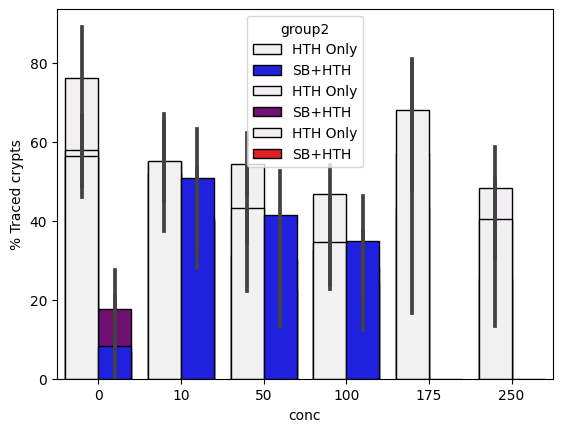

In [69]:
c = ["blue", "purple", "red"]
for i, g in enumerate(df5.groupby("crypt_bin")):
    ax = sns.barplot(data=g[1],
                     x="conc",
                     y="% Traced crypts",
                     hue="group2",
                     color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")


In [70]:
import altair as alt

In [71]:
df1=pd.DataFrame(10*np.random.rand(4,3),index=["A","B","C","D"],columns=["I","J","K"])
df2=pd.DataFrame(10*np.random.rand(4,3),index=["A","B","C","D"],columns=["I","J","K"])
df3=pd.DataFrame(10*np.random.rand(4,3),index=["A","B","C","D"],columns=["I","J","K"])

def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['DF'] = name
    return df

df1 = prep_df(df1, 'DF1')
df2 = prep_df(df2, 'DF2')
df3 = prep_df(df3, 'DF3')

df = pd.concat([df1, df2, df3])

In [72]:
df

,c1,c2,values,DF
0,A,I,5.078262,DF1
1,A,J,9.044269,DF1
2,A,K,9.471330,DF1
3,B,I,6.757194,DF1
4,B,J,1.005745,DF1
5,B,K,5.131055,DF1
6,C,I,1.196521,DF1
7,C,J,9.479965,DF1
8,C,K,7.767915,DF1
9,D,I,3.022705,DF1


In [73]:
alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('DF:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

In [74]:
df5

,Numerator,Crypts/organoid (Denominator),% Traced crypts,Trtmnt,conc,group2,group,conc2,conc3,conc4,crypt_bin
0,0.0,0.0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only,0-1
1,0.0,2.0,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only,2-4
2,1.0,0.0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only,0-1
3,0.0,2.0,0.0,0nm HTH,0,HTH Only,Crypt,0_Crypt,0_HTH Only_Crypt,0_HTH Only,2-4
4,1.0,0.0,0.0,0nm HTH,0,HTH Only,Spheroid,0_Spheroid,0_HTH Only_Spheroid,0_HTH Only,0-1
...,...,...,...,...,...,...,...,...,...,...,...
1730,1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH,0-1
1731,1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH,0-1
1732,1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH,0-1
1733,1.0,0.0,0.0,SB + 250nm HTH,250,SB+HTH,Spheroid,250_Spheroid,250_SB+HTH_Spheroid,250_SB+HTH,0-1


In [75]:
df5['conc'].unique()

array(['0', '10', '50', '100', '175', '250'], dtype=object)

In [76]:
site_order = ['0-1', '2-4','> 4']


In [77]:
figure = alt.Chart(df5).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('group2:N', title=None, axis=alt.Axis(domainWidth=1)),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(Numerator)', stack = 'normalize',
        axis=alt.Axis(
            grid=False,
            title=None, domainWidth = 2)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('conc:N',title = None, sort = df5['conc'].unique()),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('crypt_bin', sort = site_order,
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#FF0070', '#418DBE','#8DBE41'],
            ),
        ), 
order = alt.Order('color_crypt_bin_sort_index:Q')).configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    ).configure_legend(
titleFontSize=16,
labelFontSize=15
).configure_axis(labelFontSize=20,
    titleFontSize=20).properties(
    width=100,
    height=500)

In [78]:
 color=alt.Color('crypt_bin:N', sort = ['> 4', '2-4','0-1'],
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#8DBE41','#418DBE','#FF0070'],
            ),

SyntaxError: incomplete input (1435232584.py, line 5)

In [78]:
figure

alt.Chart(...)

In [79]:
df5.to_csv('fig7D_relative_percent_per_concentration_crypt_quantification.csv')

In [81]:
from altair_saver import save



In [88]:
figure.save('tgfbeta_crypts_count_per_hth_concentration_stackplot_grouped.svg')

ValueError: No enabled saver found that supports format='svg'

In [82]:
import vl_convert as vlc

def save_chart(chart, filename, scale_factor=1):
    '''
    Save an Altair chart using vl-convert
    
    Parameters
    ----------
    chart : altair.Chart
        Altair chart to save
    filename : str
        The path to save the chart to
    scale_factor: int or float
        The factor to scale the image resolution by.
        E.g. A value of `2` means two times the default resolution.
    '''
    with alt.data_transformers.enable("default"), alt.data_transformers.disable_max_rows():
        if filename.split('.')[-1] == 'svg':
            with open(filename, "w") as f:
                f.write(vlc.vegalite_to_svg(chart.to_dict()))
        elif filename.split('.')[-1] == 'png':
            with open(filename, "wb") as f:
                f.write(vlc.vegalite_to_png(chart.to_dict(), scale=scale_factor))
        else:
            raise ValueError("Only svg and png formats are supported")

In [89]:
save_chart(figure, 'my-chart.svg', 1)
